In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We load the data and it is immedeatly clear that the columns boat and body contain a lot of NaN values.

In [6]:
#read data into a dataframe
df = pd.read_excel('../data/titanic3.xls')
print(df['boat'].isnull().sum())
print(df['body'].isnull().sum())
df

823
1188


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


We change the column sex to binary values 0 for male and 1 for female. The age gets rounded down, this seems the most logical to me, and None values are kept. The columns boat and body are dropped because these have a lot of NaN values thus making them insignificant.

In [7]:
# df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1 if str(x) == 'female' else x)
df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df['age'] = df['age'].apply(lambda x: None if pd.isna(x) else int(x))
df.drop(columns=['boat', 'body'], inplace=True)
df

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0,0,0,24160,211.3375,B5,S,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.0,1,0,2665,14.4542,NaN,C,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.0,0,0,2656,7.2250,NaN,C,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0,0,0,2670,7.2250,NaN,C,NaN,0,1


We see a positive correlation between sex and survival.

<AxesSubplot: >

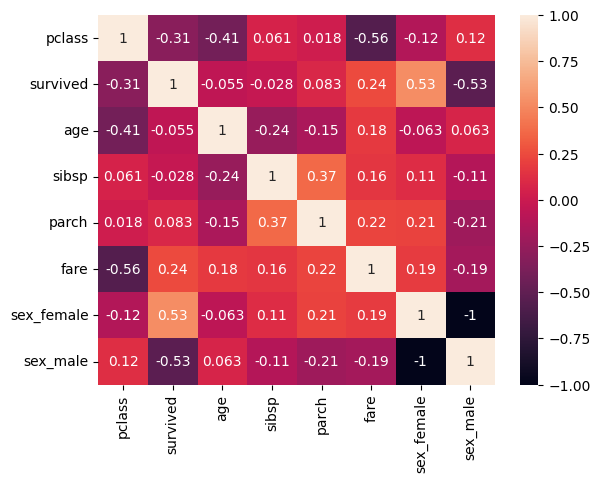

In [8]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

We see that there are no more significant correlations other than sex.

In [9]:
corr['survived'].sort_values(ascending=False)

survived      1.000000
sex_female    0.528693
fare          0.244265
parch         0.082660
sibsp        -0.027825
age          -0.055193
pclass       -0.312469
sex_male     -0.528693
Name: survived, dtype: float64

<AxesSubplot: xlabel='survived', ylabel='age'>

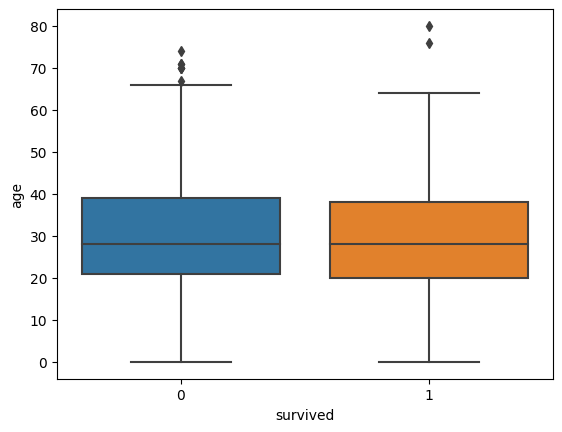

In [10]:
sns.boxplot(data=df, x='survived', y='age')

We can see that more females survived than males.

In [11]:
survived_data = df[df['survived'] == 1]

# Create a countplot
sns.countplot(data=survived_data, x='sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.show()

ValueError: Could not interpret input 'sex'